# Exercise 4.10.2 - Coding Etiquette & Excel Reporting (cont.)

### Table of Contents
#### Import libraries & data
#### STEP 6 - Visualization showing distribution of profiles
#### STEP 7 - Aggregate max, mean, and min 
#### STEP 8 - Compare profiles across regions and departments
#### STEP 9 - Charts
#### STEP 10 - Export & Observations

## Import libraries & data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path

path = r'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_4/Instacart Basket Analysis'

In [3]:
path

'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_4/Instacart Basket Analysis'

In [4]:
# Import data 

df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'instacart_final.pkl'))

In [5]:
df.shape

(30992664, 37)

In [119]:
pd.options.display.max_columns = None
df.head(15)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,region,customer_activity,age_group,income_group,department,Family_Status_Flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Regularly busy days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants
2,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,24.0,3,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,7.0,2,0,Busiest day,Busiest days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants
4,13424,Almonds,45,19,4.2,3139998,138,28,6,11,3.0,4,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants
5,14032,Tortilla Chips,107,19,3.9,505689,138,9,6,12,7.0,1,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants
6,14032,Tortilla Chips,107,19,3.9,2226790,138,26,5,12,9.0,6,1,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants
7,15672,Brownie Bites,61,19,1.8,2823056,138,8,6,14,6.0,7,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants
8,16974,Sea Salt Brown Rice Crackers,107,19,5.1,3160996,138,1,5,13,NaN,5,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants
9,16974,Sea Salt Brown Rice Crackers,107,19,5.1,1421595,138,3,2,9,9.0,5,1,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active,Seniors 65+,Lower income,snacks,Married with NO Dependants


In [120]:
df.tail(15)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,region,customer_activity,age_group,income_group,department,Family_Status_Flag
30992649,16560,Organic Stage 2 Carrots Baby Food,92,18,8.6,2400169,11731,3,1,11,20.0,1,0,Regularly busy,Busiest days,Most orders,5,New customer,8.400000,Low spender,12.5,Regular customer,Roy,Wade,Male,Alabama,34,11/7/2019,1,married,79389,South,Highly active,Under 40,Middle income,babies,Married with NO Dependants
30992650,16560,Organic Stage 2 Carrots Baby Food,92,18,8.6,732179,11731,4,2,8,8.0,1,1,Regularly busy,Regularly busy days,Average orders,5,New customer,8.400000,Low spender,12.5,Regular customer,Roy,Wade,Male,Alabama,34,11/7/2019,1,married,79389,South,Highly active,Under 40,Middle income,babies,Married with NO Dependants
30992651,16560,Organic Stage 2 Carrots Baby Food,92,18,8.6,2523428,11731,5,5,13,17.0,1,1,Regularly busy,Regularly busy days,Most orders,5,New customer,8.400000,Low spender,12.5,Regular customer,Roy,Wade,Male,Alabama,34,11/7/2019,1,married,79389,South,Highly active,Under 40,Middle income,babies,Married with NO Dependants
30992652,45767,Sunny Days Strawberry Snack Bars,92,18,1.8,1054407,31220,4,2,10,6.0,3,0,Regularly busy,Regularly busy days,Most orders,9,New customer,6.920000,Low spender,19.0,Regular customer,Rose,Larsen,Female,Delaware,39,12/4/2018,2,married,38018,South,Highly active,Under 40,Lower income,babies,Married WITH Dependants
30992653,45767,Sunny Days Strawberry Snack Bars,92,18,1.8,1791205,31220,5,3,14,8.0,3,1,Regularly busy,Least busy days,Most orders,9,New customer,6.920000,Low spender,19.0,Regular customer,Rose,Larsen,Female,Delaware,39,12/4/2018,2,married,38018,South,Highly active,Under 40,Lower income,babies,Married WITH Dependants
30992654,45767,Sunny Days Strawberry Snack Bars,92,18,1.8,2981166,31220,8,3,15,22.0,3,1,Regularly busy,Least busy days,Most orders,9,New customer,6.920000,Low spender,19.0,Regular customer,Rose,Larsen,Female,Delaware,39,12/4/2018,2,married,38018,South,Highly active,Under 40,Lower income,babies,Married WITH Dependants
30992655,45767,Sunny Days Strawberry Snack Bars,92,18,1.8,901746,31220,9,5,13,23.0,3,1,Regularly busy,Regularly busy days,Most orders,9,New customer,6.920000,Low spender,19.0,Regular customer,Rose,Larsen,Female,Delaware,39,12/4/2018,2,married,38018,South,Highly active,Under 40,Lower income,babies,Married WITH Dependants
30992656,47167,Organic Sunny Days Apple Snack Bars,92,18,9.3,1791205,31220,5,3,14,8.0,2,0,Regularly busy,Least busy days,Most orders,9,New customer,6.920000,Low spender,19.0,Regular customer,Rose,Larsen,Female,Delaware,39,12/4/2018,2,married,38018,South,Highly active,Under 40,Lower income,babies,Married WITH Dependants
30992657,47167,Organic Sunny Days Apple Snack Bars,92,18,9.3,2981166,31220,8,3,15,22.0,2,1,Regularly busy,Least busy days,Most orders,9,New customer,6.920000,Low spender,19.0,Regular customer,Rose,Larsen,Female,Delaware,39,12/4/2018,2,married,38018,South,Highly active,Under 40,Lower income,babies,Married WITH Dependants
30992658,47167,Organic Sunny Days Apple Snack Bars,92,18,9.3,901746,31220,9,5,13,23.0,2,1,Regularly busy,Regularly busy days,Most orders,9,New customer,6.920000,Low spender,19.0,Regular customer,Rose,Larsen,Female,Delaware,39,12/4/2018,2,married,38018,South,Highly active,Under 40,Lower income,babies,Married WITH Dependants


## STEP 6: Create an appropriate visualization to show the distribution of profiles.

### Customer Age

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/1447276513.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000'),
 Text(0, 14000000.0, '14,000,000')]

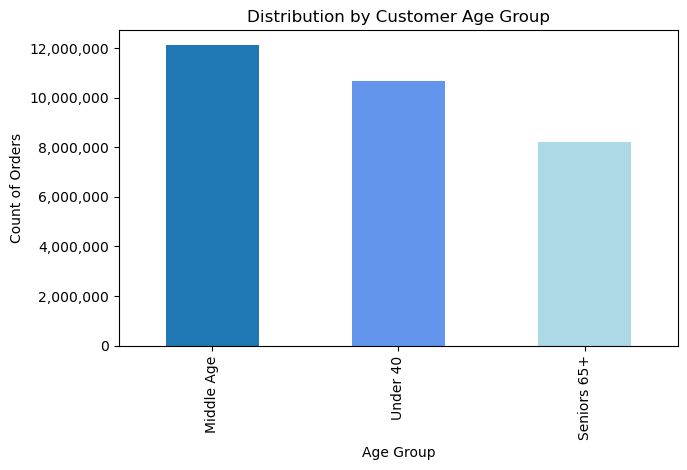

In [173]:
# Creating bar chart

bar_age_group = df['age_group'].value_counts().plot.bar(color=['tab:blue', 'cornflowerblue', 'lightblue'])
plt.title('Distribution by Customer Age Group', fontsize=12)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count of Orders', fontsize=10)
plt.tight_layout()    # Automatically adjust subplot parameters

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#### Most Instacart customers are Middle Age (40-64 years), followed by Under 40, then Seniors 65+.

In [239]:
# Exporting visualization

bar_age_group.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','age_group_bar.png'), bbox_inches='tight')

### Gender

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/2381303649.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000'),
 Text(0, 14000000.0, '14,000,000'),
 Text(0, 16000000.0, '16,000,000'),
 Text(0, 18000000.0, '18,000,000')]

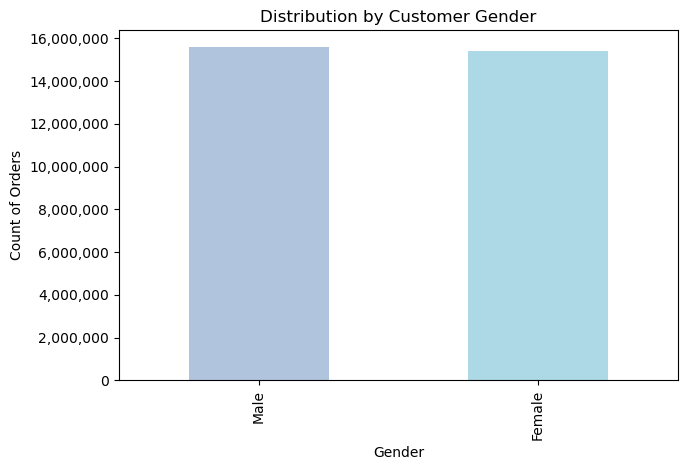

In [174]:
# Gender bar chart

bar_gender = df['gender'].value_counts().plot.bar(color = ['lightsteelblue', 'lightblue'])
plt.title('Distribution by Customer Gender', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count of Orders', fontsize=10)
plt.tight_layout() 

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#### Instacart has the same number of Male and Female customers -- a near 50/50 perfectly even split.

In [240]:
# Exporting visualization

bar_gender.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','gender_bar.png'), bbox_inches='tight')

### Age & Gender

In [11]:
# Adding gender to age group bar above 

gender_age_group = pd.crosstab(df['age_group'], df['gender'], dropna = False)

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/971922028.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000'),
 Text(0, 14000000.0, '14,000,000')]

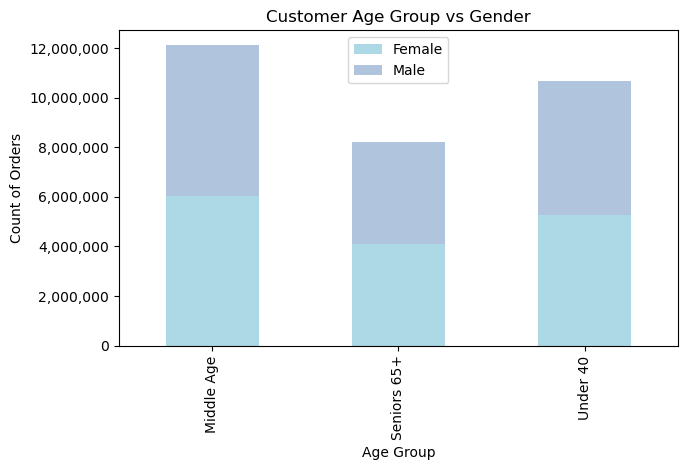

In [175]:
gender_age_group_bar = gender_age_group.plot.bar(stacked = True, color = ['lightblue', 'lightsteelblue'])
plt.title('Customer Age Group vs Gender', fontsize=12)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count of Orders', fontsize=10)
plt.legend()
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [13]:
gender_age_group.describe()

gender,Female,Male
count,3.000000e+00,3.000000e+00
mean,5.130662e+06,5.200226e+06
std,9.722820e+05,1.006763e+06
min,4.091891e+06,4.110855e+06
25%,4.686546e+06,4.752152e+06
50%,5.281200e+06,5.393450e+06
75%,5.650048e+06,5.744912e+06
max,6.018895e+06,6.096373e+06


#### We see the same number of males and females across all age groups.

In [241]:
# Exporting visualization

gender_age_group_bar.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','age_gender.png'), bbox_inches='tight')

### Income

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/2461689768.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000')]

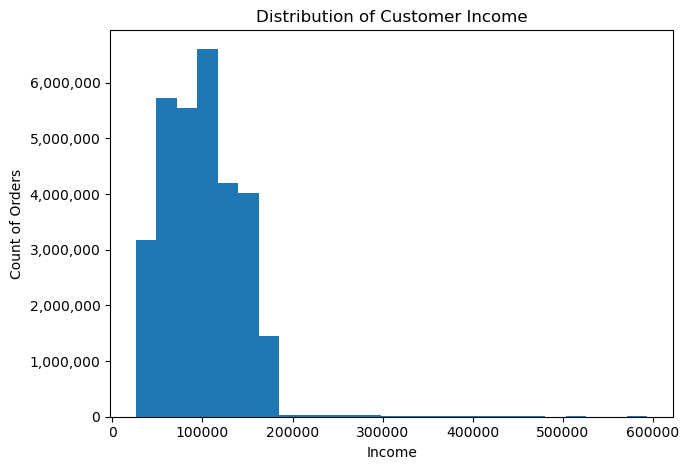

In [176]:
# Creating histogram

hist_income = df['income'].plot.hist(bins = 25)
plt.title('Distribution of Customer Income')
plt.xlabel('Income')
plt.ylabel('Count of Orders')
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#### This histogram nicely demonstrates the descriptive statistics on income calculated in 4.10.1 -- nearly 50% of all Instacart orders come from customers in the Middle Income group (67k to 128k).

In [242]:
# Exporting image

hist_income.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','income_hist.png'), bbox_inches='tight')

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/4149402369.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000'),
 Text(0, 14000000.0, '14,000,000'),
 Text(0, 16000000.0, '16,000,000'),
 Text(0, 18000000.0, '18,000,000')]

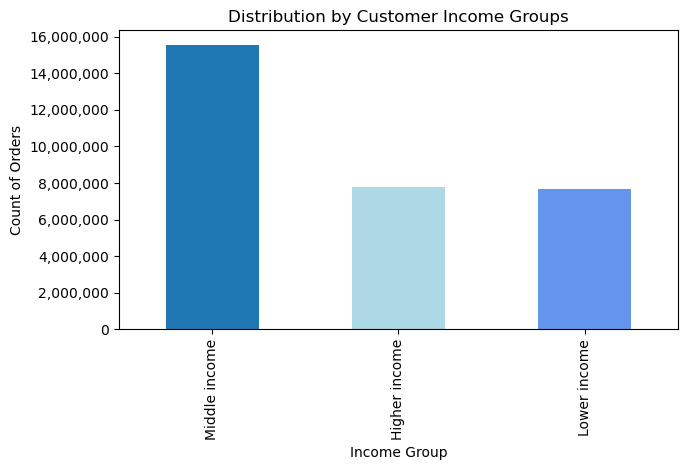

In [177]:
# Creating bar chart

bar_income_groups = df['income_group'].value_counts().plot.bar(color=['tab:blue', 'lightblue', 'cornflowerblue'])
plt.title('Distribution by Customer Income Groups', fontsize=12)
plt.xlabel('Income Group')
plt.ylabel('Count of Orders', fontsize=10)
plt.tight_layout()  

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#### Another visualization showing that half of all orders come from the Middle income group.

In [243]:
# Exporting visualization

bar_income_groups.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','income_groups_bar.png'), bbox_inches='tight')

### Income & Gender

In [19]:
# Adding gender to income bar above

gender_income_group = pd.crosstab(df['income_group'], df['gender'], dropna = False)

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/1652597082.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000'),
 Text(0, 14000000.0, '14,000,000'),
 Text(0, 16000000.0, '16,000,000'),
 Text(0, 18000000.0, '18,000,000')]

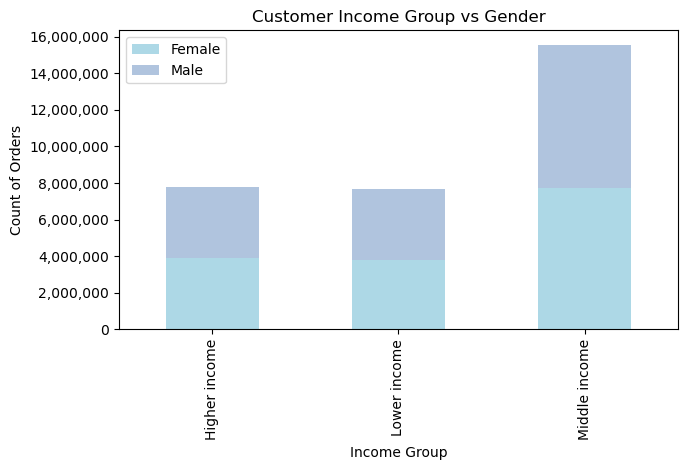

In [178]:
bar_gender_income_group = gender_income_group.plot.bar(stacked = True, color = ['lightblue', 'lightsteelblue'])
plt.title('Customer Income Group vs Gender', fontsize=12)
plt.xlabel('Income Group', fontsize=10)
plt.ylabel('Count of Orders', fontsize=10)
plt.legend()
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#### Gender is split evenly across income groups.

In [244]:
# Exporting visualization

bar_gender_income_group.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','income_gender.png'), bbox_inches='tight')

In [85]:
gender_income_group.describe()

gender,Female,Male
count,3.000000e+00,3.000000e+00
mean,5.130662e+06,5.200226e+06
std,2.229225e+06,2.303669e+06
min,3.780813e+06,3.852400e+06
25%,3.844138e+06,3.870242e+06
50%,3.907463e+06,3.888084e+06
75%,5.805586e+06,5.874139e+06
max,7.703710e+06,7.860194e+06


### Dependants

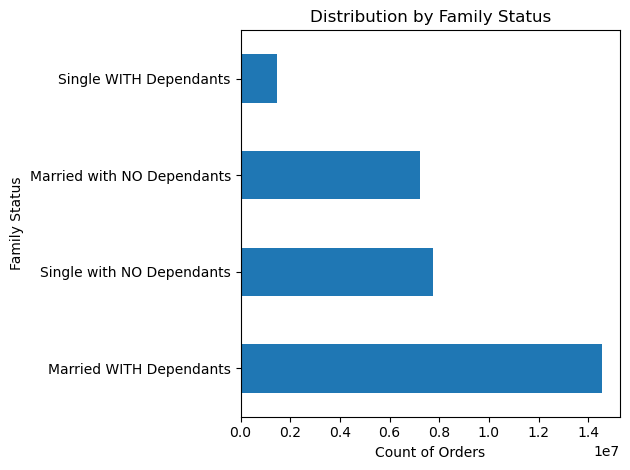

In [181]:
# Creating bar chart

bar_family_status = df['Family_Status_Flag'].value_counts().plot.barh()
plt.title('Distribution by Family Status')
plt.xlabel('Count of Orders')
plt.ylabel('Family Status')
plt.tight_layout()


#### The most orders are placed by customers who are married WITH dependants.

In [28]:
# Exporting visualization

bar_family_status.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'family_status_bar.png'), bbox_inches='tight')

### Family Status & Gender

In [86]:
# Checking family status vs gender

gender_family_status = pd.crosstab(df['Family_Status_Flag'], df['gender'], dropna = False)

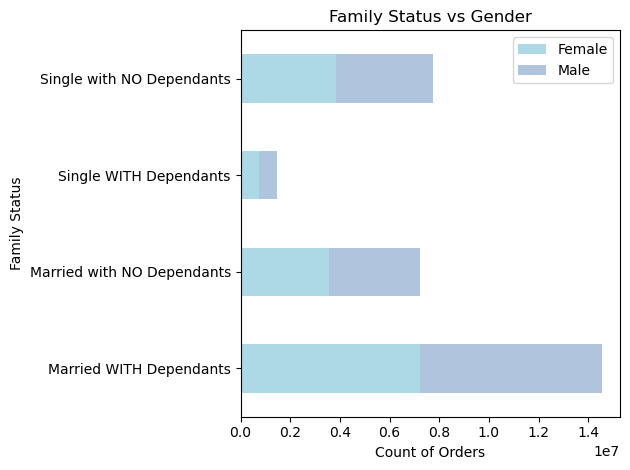

In [95]:
bar_gender_family_status = gender_family_status.plot.barh(stacked = True, color = ['lightblue', 'lightsteelblue'])
plt.title('Family Status vs Gender', fontsize=12)
plt.xlabel('Count of Orders', fontsize=10)
plt.ylabel('Family Status', fontsize=10)
plt.legend()
plt.tight_layout()

#### Gender is split evenly across family status.

In [96]:
# Exporting visualization

bar_gender_family_status.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'gender_family_status.png'), bbox_inches='tight')

### Family Status & Income

In [89]:
# Checking family status vs income

family_status_income = pd.crosstab(df['Family_Status_Flag'], df['income_group'], dropna = False)

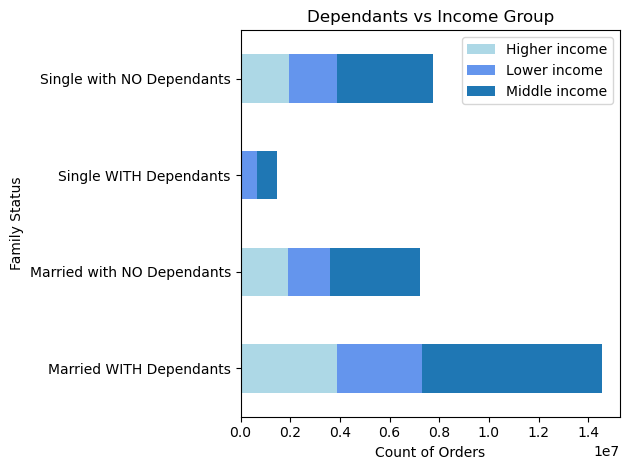

In [245]:
bar_family_status_income = family_status_income.plot.barh(stacked = True, color=['lightblue', 'cornflowerblue', 'tab:blue'])
plt.title('Dependants vs Income Group', fontsize=12)
plt.xlabel('Count of Orders', fontsize=10)
plt.ylabel('Family Status', fontsize=10)
plt.legend()
plt.tight_layout()

#### We see 25% Lower income, 50% Middle income, 25% Higher income across all family status, except for single WITH dependants where there is a 50/50 split between lower and middle income (no higher income).

In [246]:
# Exporting visualization

bar_family_status_income.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'income_family_status.png'), bbox_inches='tight')

In [94]:
family_status_income.describe()

income_group,Higher income,Lower income,Middle income
count,4.000000e+00,4.000000e+00,4.000000e+00
mean,1.939966e+06,1.917224e+06,3.890976e+06
std,1.577719e+06,1.132373e+06,2.641694e+06
min,1.778500e+04,6.587210e+05,8.061050e+05
25%,1.438136e+06,1.433152e+06,2.912521e+06
50%,1.929982e+06,1.802848e+06,3.749456e+06
75%,2.431812e+06,2.286920e+06,4.727911e+06
max,3.882113e+06,3.404479e+06,7.258887e+06


### Dependants & Order Hour of Day

In [30]:
# Checking family status vs 'order_hour_of_day'

family_status_hour_day = pd.crosstab(df['order_hour_of_day'], df['Family_Status_Flag'], dropna = False)

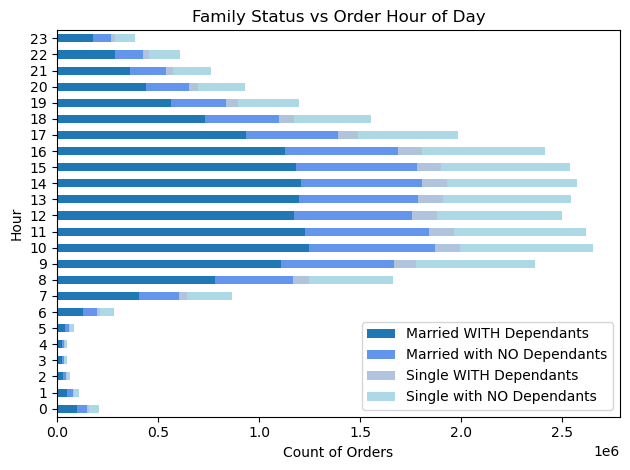

In [31]:
# Creating stacked bar chart to show family status by hour of the day

bar_family_status_hour_day = family_status_hour_day.plot.barh(stacked = True, color = ['tab:blue', 'cornflowerblue', 'lightsteelblue', 'lightblue'])
plt.title('Family Status vs Order Hour of Day')
plt.xlabel('Count of Orders')
plt.ylabel('Hour')
plt.legend()
plt.tight_layout()

In [32]:
# Exporting visualization

bar_family_status_hour_day.figure.savefig(os.path.join(path,'04_Analysis', 'Visualizations', 'family_status_hour_day.png'), bbox_inches='tight')

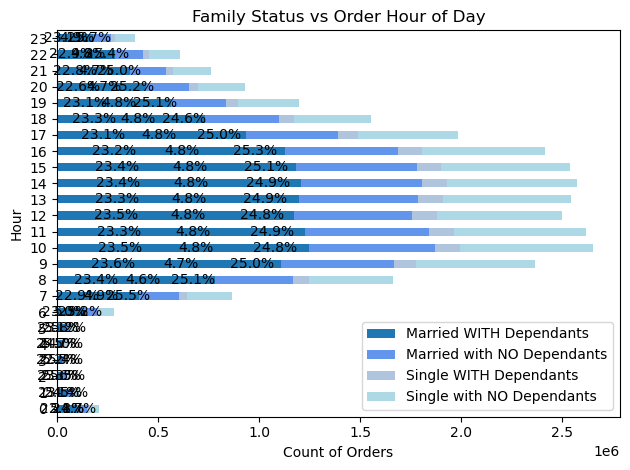

In [84]:
# Creating a stacked percentage bar of the above

percentbar_family_status_hour_day = family_status_hour_day.plot.barh(stacked = True, mark_right = True, color = ['tab:blue', 'cornflowerblue', 'lightsteelblue', 'lightblue'])
plt.title('Family Status vs Order Hour of Day')
plt.xlabel('Count of Orders')
plt.ylabel('Hour')
plt.legend()
plt.tight_layout()

family_status_hour_day_total = family_status_hour_day['Married WITH Dependants'] + family_status_hour_day['Married with NO Dependants'] + family_status_hour_day['Single WITH Dependants'] + family_status_hour_day['Single with NO Dependants']
    
family_status_hour_day_rel = family_status_hour_day[family_status_hour_day.columns[1:]].div(family_status_hour_day_total, 0)*100

for n in family_status_hour_day_rel: 
    for i, (cs, ab, pc) in enumerate(zip(family_status_hour_day.iloc[:, 1:].cumsum(1)[n],  
                                         family_status_hour_day[n], family_status_hour_day_rel[n])): 
             plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center')   


In [34]:
# Creating a line chart showing family status flags vs hour of day

df_family_hour = df[['order_hour_of_day', 'Family_Status_Flag']]

NameError: name 'x' is not defined

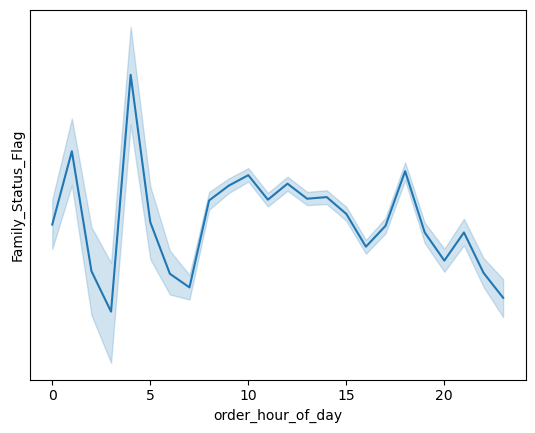

In [37]:
line_status_hour = sns.lineplot(data = df_family_hour, x = 'order_hour_of_day', y = 'Family_Status_Flag')
#Plotting all the lines with specifying labels
plt.plot(x, y = (df_family_hour['Family_Status_Flag'] == 'Married WITH Dependants'), label = 'Married WITH Dependants')
plt.plot(x, y = (df_family_hour['Family_Status_Flag'] == 'Married with NO Dependants'), label = 'Married with NO Dependants')
plt.plot(x, y = (df_family_hour['Family_Status_Flag'] == 'Single WITH Dependants'), label = 'Single WITH Dependants')
plt.plot(x, y = (df_family_hour['Family_Status_Flag'] == 'Single with NO Dependants'), label = 'Single with NO Dependants')
plt.title('Family Status by Order Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Family Status') 
plt.legend()
plt.tight_layout()

### Gender & Order Hour of Day

In [126]:
# Checking gender vs 'order_hour_of_day'

gender_hour_day = pd.crosstab(df['order_hour_of_day'], df['gender'], dropna = False)

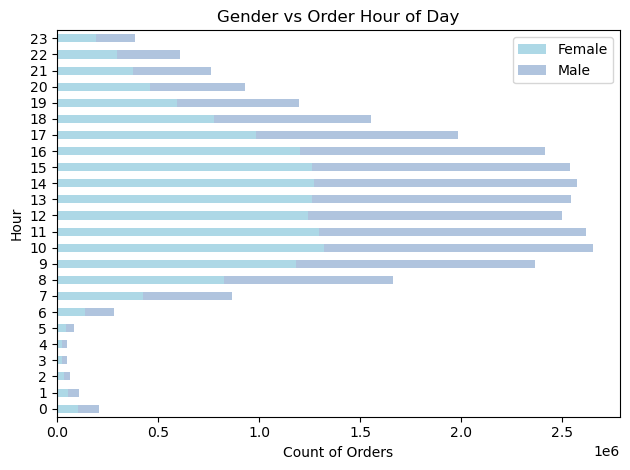

In [128]:
# Creating stacked bar chart to show gender by order hour of the day

bar_gender_hour_day = gender_hour_day.plot.barh(stacked = True, color = ['lightblue', 'lightsteelblue'])
plt.title('Gender vs Order Hour of Day')
plt.xlabel('Count of Orders')
plt.ylabel('Hour')
plt.legend()
plt.tight_layout()

#### No discernable differences in gender vs order hour of the day.

In [130]:
# Exporting visualization 

bar_gender_hour_day.figure.savefig(os.path.join(path,'04_Analysis', 'Visualizations', 'gender_hour_day.png'), bbox_inches='tight')

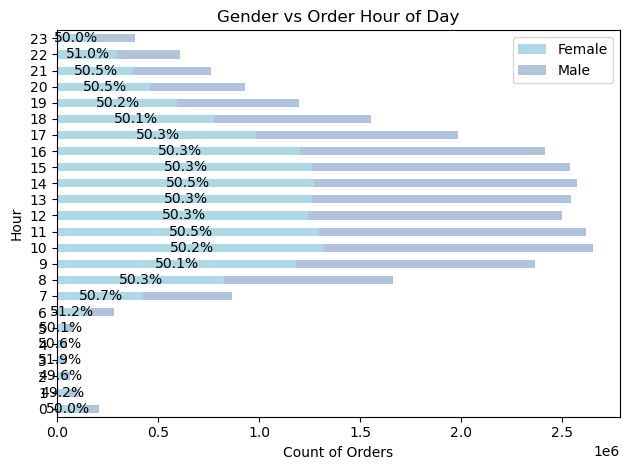

In [129]:
# Creating a stacked percentage bar of the above

percentbar_gender_hour_day = gender_hour_day.plot.barh(stacked = True, mark_right = True, color = ['lightblue', 'lightsteelblue'])
plt.title('Gender vs Order Hour of Day')
plt.xlabel('Count of Orders')
plt.ylabel('Hour')
plt.legend()
plt.tight_layout()

gender_hour_day_total = gender_hour_day['Female'] + gender_hour_day['Male']
    
gender_hour_day_rel = gender_hour_day[gender_hour_day.columns[1:]].div(gender_hour_day_total, 0)*100

for n in gender_hour_day_rel: 
    for i, (cs, ab, pc) in enumerate(zip(gender_hour_day.iloc[:, 1:].cumsum(1)[n],  
                                         gender_hour_day[n], gender_hour_day_rel[n])): 
             plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center') 

### Departments

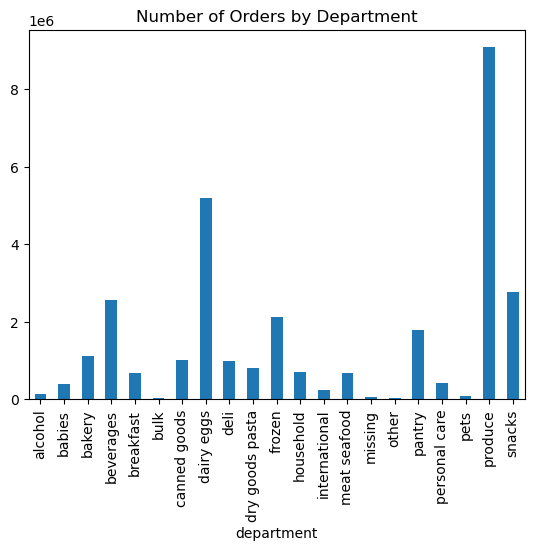

In [22]:
# Creating bar chart to visualize number of orders by department

bar_dep = df['department'].value_counts().sort_index().plot.bar(title = 'Number of Orders by Department')

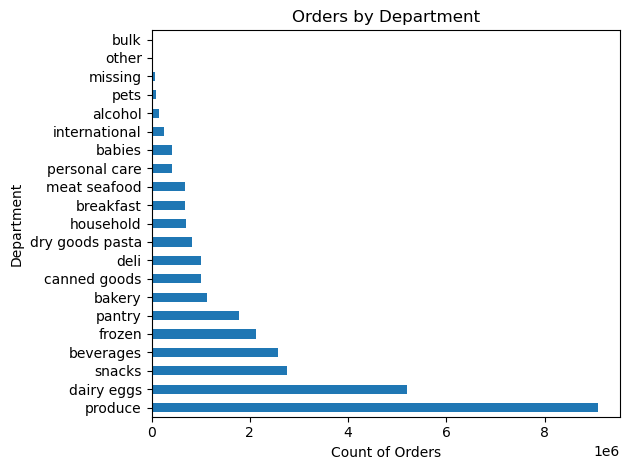

In [23]:
# Reordering bar chart

bar_dep_2 = df['department'].value_counts().plot.barh()
plt.title('Orders by Department')
plt.xlabel('Count of Orders')
plt.ylabel('Department')
plt.tight_layout()

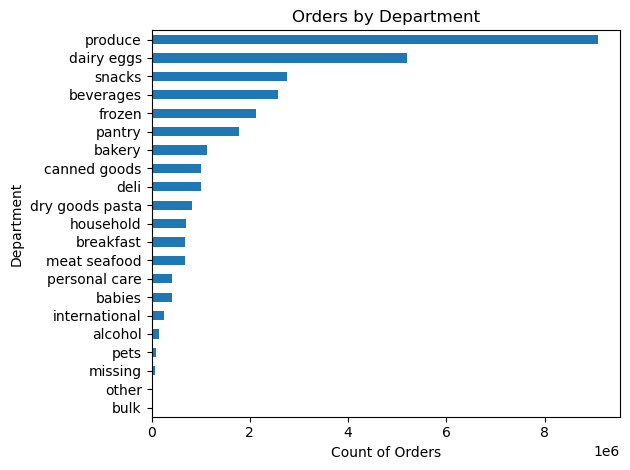

In [25]:
bar_dep_3 = df['department'].value_counts().sort_values(ascending = True).plot.barh()
plt.title('Orders by Department')
plt.xlabel('Count of Orders')
plt.ylabel('Department')
plt.tight_layout()

In [26]:
# Exporting visualization

bar_dep_3.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'dep_bar.png'), bbox_inches='tight')

#### Produce is the most popular department, followed by dairy eggs, then snacks.

## STEP 7: Aggregate the max, mean, and min variable on a customer-profile level for usage frequency and expenditure.

In [137]:
# Aggregate min, max, and mean on customer's 'age' for usage and expenditure

cust_prof = df.groupby('age')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [138]:
cust_prof

days_since_prior_order                  prices                    
                       min   max       mean    min      max       mean
age                                                                   
18                     0.0  30.0  10.971065    1.0  99999.0  11.052778
19                     0.0  30.0  10.717765    1.0  99999.0   9.424082
20                     0.0  30.0  10.956664    1.0  99999.0  11.096084
21                     0.0  30.0  10.669195    1.0  99999.0  16.480922
22                     0.0  30.0  10.571547    1.0  99999.0  10.635297
..                     ...   ...        ...    ...      ...        ...
77                     0.0  30.0  10.888012    1.0  99999.0  12.726203
78                     0.0  30.0  10.975619    1.0  99999.0  12.716068
79                     0.0  30.0  10.691807    1.0  99999.0  12.117961
80                     0.0  30.0  10.724120    1.0  99999.0  10.943400
81                     0.0  30.0  10.838995    1.0  99999.0   9.781078

[64 rows x 6 columns]

In [139]:
# Aggregate min, max, and mean on customer's 'age group' for usage and expenditure

cust_prof2 = df.groupby('age_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [140]:
cust_prof2

days_since_prior_order                  prices                    
                               min   max       mean    min      max       mean
age_group                                                                     
Middle Age                     0.0  30.0  10.822001    1.0  99999.0  11.945818
Seniors 65+                    0.0  30.0  10.792184    1.0  99999.0  11.758945
Under 40                       0.0  30.0  10.811221    1.0  99999.0  12.056513

In [141]:
# Aggregate min, max, and mean on customer's 'income group' for usage and expenditure

cust_prof3 = df.groupby('income_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [142]:
cust_prof3

days_since_prior_order                  prices           \
                                 min   max       mean    min      max   
income_group                                                            
Higher income                    0.0  30.0  10.756972    1.0  99999.0   
Lower income                     0.0  30.0  10.966069    1.0  14900.0   
Middle income                    0.0  30.0  10.760505    1.0  99999.0   

                          
                    mean  
income_group              
Higher income  21.951583  
Lower income    7.306463  
Middle income   9.220546

In [143]:
# Aggregate min, max, and mean on customer's 'family status' for usage and expenditure

cust_prof4 = df.groupby('Family_Status_Flag')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [144]:
cust_prof4

days_since_prior_order                  prices  \
                                              min   max       mean    min   
Family_Status_Flag                                                          
Married WITH Dependants                       0.0  30.0  10.824297    1.0   
Married with NO Dependants                    0.0  30.0  10.814663    1.0   
Single WITH Dependants                        0.0  30.0  10.750739    1.0   
Single with NO Dependants                     0.0  30.0  10.791750    1.0   

                                                
                                max       mean  
Family_Status_Flag                              
Married WITH Dependants     99999.0  12.102900  
Married with NO Dependants  99999.0  11.627748  
Single WITH Dependants      99999.0  10.892382  
Single with NO Dependants   99999.0  12.103485

In [46]:
# Aggregate min, max, and mean on 'gender' for usage and expenditure

cust_prof5 = df.groupby('gender')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [47]:
cust_prof5

days_since_prior_order                  prices                    
                          min   max       mean    min      max       mean
gender                                                                   
Female                    0.0  30.0  10.794452    1.0  99999.0  11.838889
Male                      0.0  30.0  10.826130    1.0  99999.0  12.028802

## STEPS 8 & 9: Compare your customer profiles with regions and departments, and identify any links between them. Produce suitable charts to illustrate your results and export them in your project folder.

### Age Groups by Region

In [50]:
# Checking 'age_group' across regions

region_age = pd.crosstab(df['region'], df['age_group'], dropna=False)

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/1195835492.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 500000.0, '500,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1500000.0, '1,500,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 2500000.0, '2,500,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 3500000.0, '3,500,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 4500000.0, '4,500,000')]

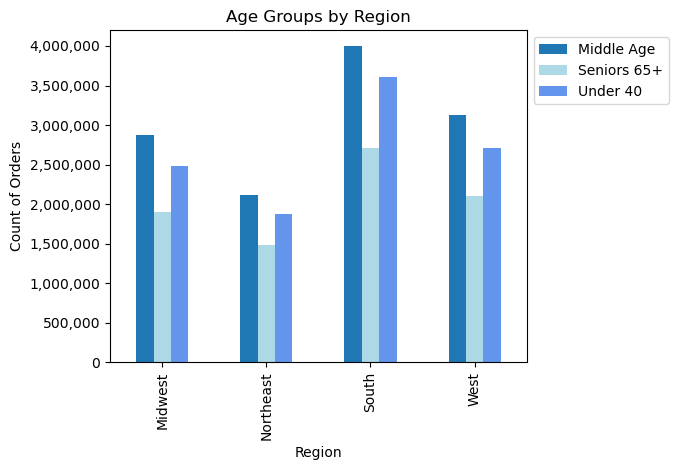

In [185]:
# Creating visualization for 'age_region' crosstab with a bar chart

bar_region_age = region_age.plot.bar(color=['tab:blue', 'lightblue', 'cornflowerblue'])
plt.title('Age Groups by Region')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#### No discernable differences in age groups across regions.

In [136]:
# Exporting visualization

bar_region_age.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','region_age_bar.png'), bbox_inches='tight')

### Income Groups by Region

In [48]:
# Checking income groups by regions

region_income = pd.crosstab(df['income_group'], df['region'], dropna = False)

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/2817851667.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000')]

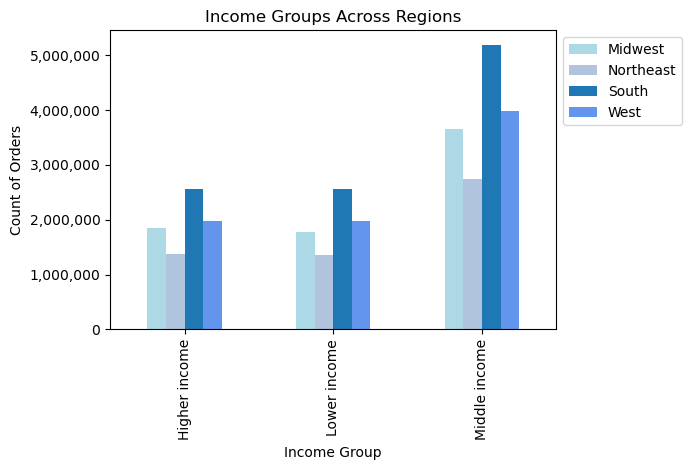

In [186]:
# Visualization of 'income_group' and 'region'

bar_region_income = region_income.plot.bar(color = ['lightblue', 'lightsteelblue', 'tab:blue', 'cornflowerblue'])
plt.title('Income Groups Across Regions')
plt.xlabel('Income Group')
plt.ylabel('Count of Orders')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [135]:
# Exporting visualization

bar_region_income.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_region_income.png'), bbox_inches='tight')

### Gender by Region

In [182]:
# Checking gender by regions

region_gender = pd.crosstab(df['gender'], df['region'], dropna = False)

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/2316376427.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000')]

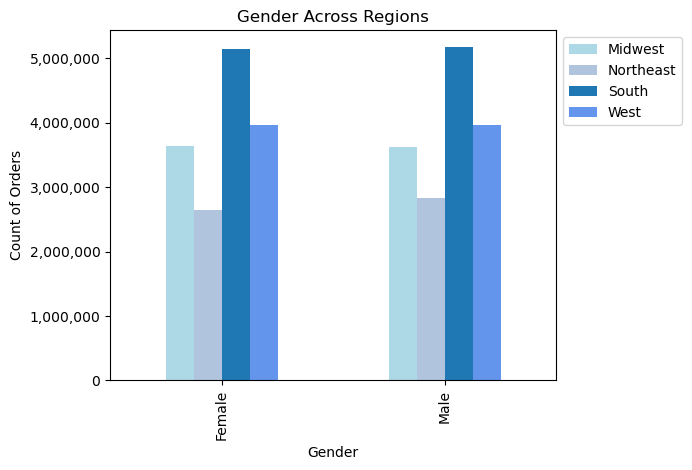

In [187]:
# Visualization of 'gender' and 'region'

bar_region_gender = region_gender.plot.bar(color = ['lightblue', 'lightsteelblue', 'tab:blue', 'cornflowerblue'])
plt.title('Gender Across Regions')
plt.xlabel('Gender')
plt.ylabel('Count of Orders')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [189]:
# Exporting visualization

bar_region_gender.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'gender_across_regions.png'), bbox_inches='tight')

### Age Groups vs Income Groups

In [52]:
# Cross-checking age groups with income groups

age_group_income = pd.crosstab(df['age_group'], df['income_group'], dropna = False)

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/4005630323.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000')]

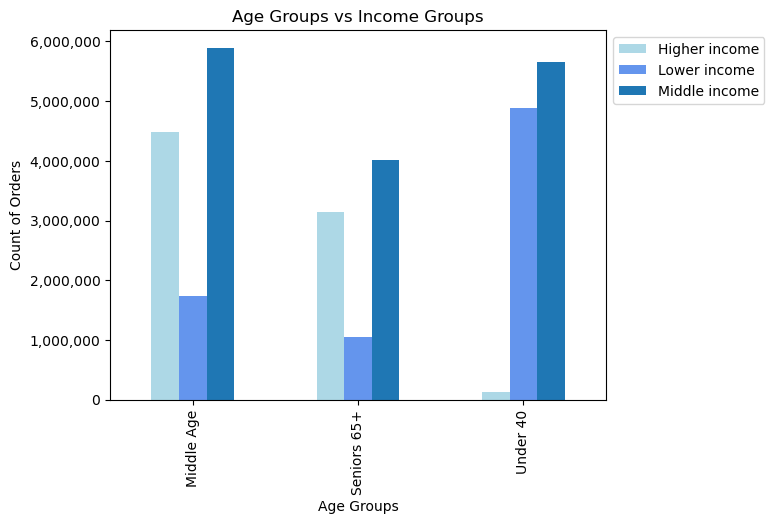

In [188]:
# Creating visualization

bar_age_group_income = age_group_income.plot.bar(color=['lightblue', 'cornflowerblue', 'tab:blue'])
plt.title('Age Groups vs Income Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count of Orders')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [118]:
# Exporting visualization

bar_age_group_income.figure.savefig(os.path.join(path,'04_Analysis', 'Visualizations', 'income_age_group.png'), bbox_inches='tight')

### Family Status vs Department

In [54]:
# Pivot data to create a stacked bar chart for relationship between 'departments' and 'customers_profile'

custom_fam_dep = df.groupby(['department', 'Family_Status_Flag']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

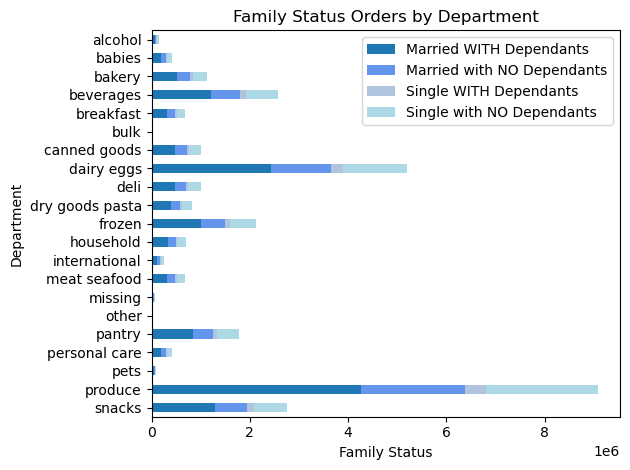

In [156]:
# Creating stacked bar graph

plt.figure(figsize=(12, 6))
stacked_cust_dep = custom_fam_dep.sort_values('department', ascending = False).plot.barh(stacked = True, color = ['tab:blue', 'cornflowerblue', 'lightsteelblue', 'lightblue'])
plt.title('Family Status Orders by Department')
plt.xlabel('Family Status')
plt.ylabel('Department')
plt.legend()
plt.tight_layout()

In [167]:
# Export stacked bar chart

stacked_cust_dep.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'stacked_cust_dept_bar.png'), bbox_inches='tight')

### Age Group by Department

In [56]:
# Create a crosstab to count age categories through each department

dep_age_group = pd.crosstab(df['department'], df['age_group'])

<Figure size 1200x600 with 0 Axes>

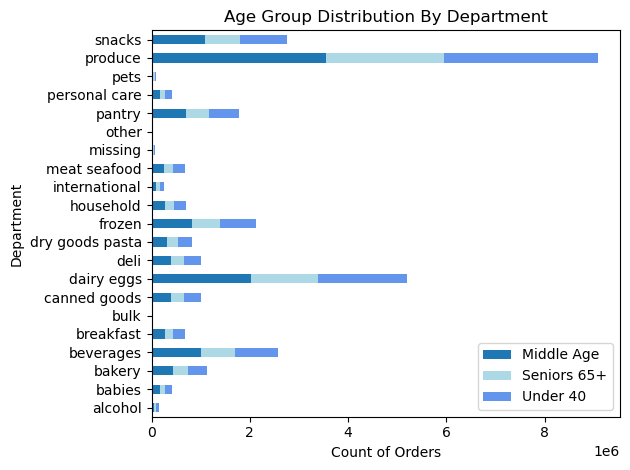

In [76]:
# Creating clustered bar chart

plt.figure(figsize=(12, 6))
clustered_age_dep = dep_age_group.plot(kind = 'barh', stacked = True, color=['tab:blue', 'lightblue', 'cornflowerblue'])
plt.title('Age Group Distribution By Department')
plt.xlabel('Count of Orders')
plt.ylabel('Department')
plt.legend()
plt.tight_layout()

In [ ]:
# Exporting visualization

clustered_age_dep.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'clustered_age_dept.png'), bbox_inches='tight')

### Income Group by Department

In [58]:
# Creating crosstab by department and income group

dep_income = pd.crosstab(df['department'], df['income_group'], dropna = False)

<Figure size 1200x600 with 0 Axes>

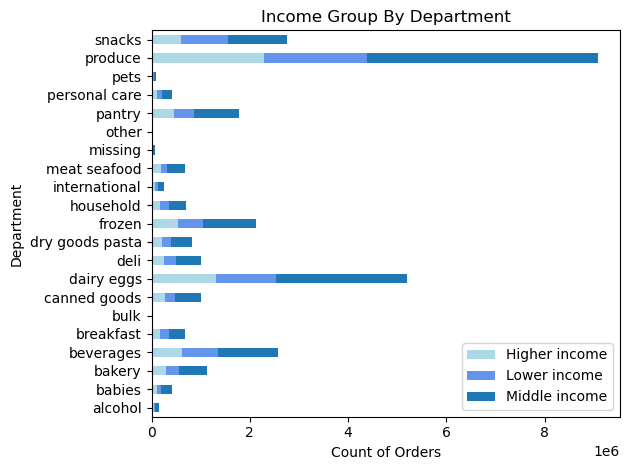

In [82]:
# Creating visualization

plt.figure(figsize=(12, 6))
bar_dep_income = dep_income.sort_values(by = ['department'], ascending = True).plot.barh(stacked = True, color=['lightblue', 'cornflowerblue', 'tab:blue'])
plt.title('Income Group By Department')
plt.xlabel('Count of Orders')
plt.ylabel('Department')
plt.legend()
plt.tight_layout()

In [ ]:
# Exporting visualization

bar_dep_income.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'stacked_income_dept.png'), bbox_inches='tight')

### Order Frequency by Loyalty Group

In [191]:
# Creating crosstab by order frequency and loyalty group

freq_loyalty = pd.crosstab(df['frequency_flag'], df['loyalty_flag'], dropna = False)

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/905227972.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000')]

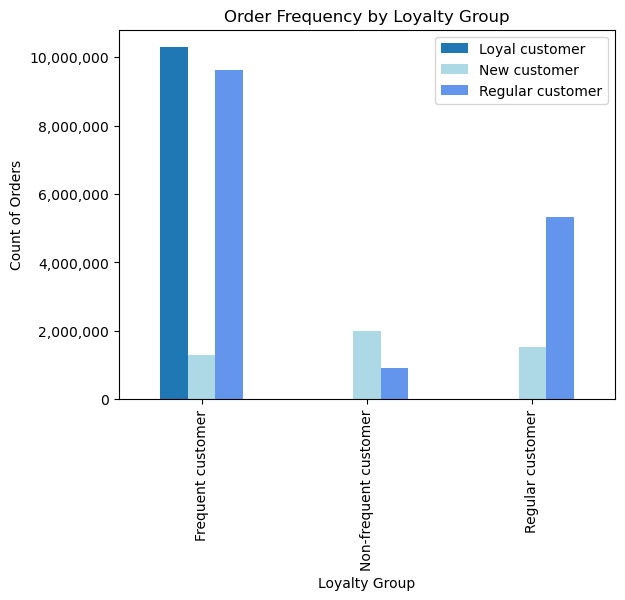

In [196]:
# Creating visualization

bar_freq_loyalty = freq_loyalty.plot.bar(color=['tab:blue', 'lightblue', 'cornflowerblue'])
plt.title('Order Frequency by Loyalty Group')
plt.xlabel('Loyalty Group')
plt.ylabel('Count of Orders')
plt.legend()

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [197]:
# Exporting visualization

bar_freq_loyalty.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'freq_loyalty_bar.png'), bbox_inches='tight')

<Figure size 1200x600 with 0 Axes>

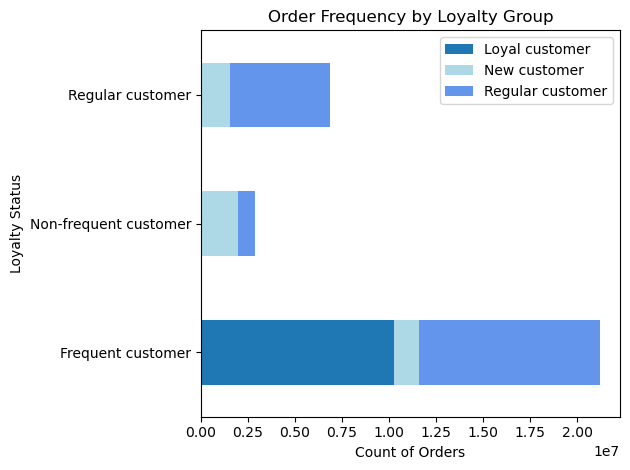

In [214]:
# Creating stacked bar of above

freq_loyalty_2 = pd.crosstab(df['loyalty_flag'], df['loyalty_flag'], dropna = False)

plt.figure(figsize=(12, 6))
stackedbar_freq_loyalty = freq_loyalty.sort_values(by = ['frequency_flag'], ascending = True).plot.barh(stacked = True, color=['tab:blue', 'lightblue', 'cornflowerblue'])
plt.title('Order Frequency by Loyalty Group')
plt.xlabel('Count of Orders')
plt.ylabel('Loyalty Status')
plt.legend()
plt.tight_layout()

In [215]:
# Exporting visualization

stackedbar_freq_loyalty.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'freq_loyalty_stackedbar.png'), bbox_inches='tight')

### Loyalty Status by Region

In [224]:
# Creating crosstab by loyalty and region

region_loyalty = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/2309450832.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000')]

<Figure size 1200x600 with 0 Axes>

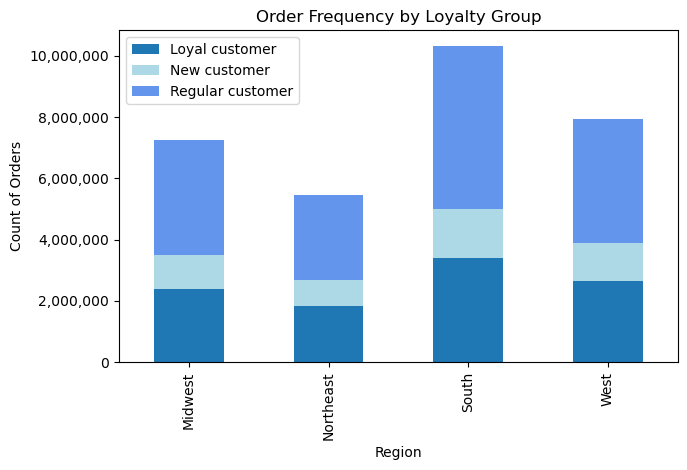

In [233]:
# Creating stacked bar

plt.figure(figsize=(12, 6))
stackedbar_region_loyalty = region_loyalty.sort_values(by = ['region']).plot.bar(stacked = True, color=['tab:blue', 'lightblue', 'cornflowerblue'])
plt.title('Order Frequency by Loyalty Group')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend()
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/1551504945.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000')]

<Figure size 1200x600 with 0 Axes>

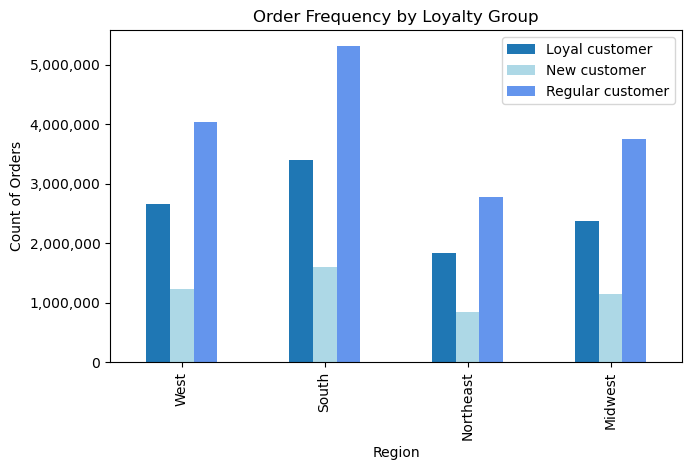

In [237]:
# Creating bar of the above


plt.figure(figsize=(12, 6))
bar_region_loyalty = region_loyalty.sort_values(by = ['region'], ascending = False).plot.bar(color=['tab:blue', 'lightblue', 'cornflowerblue'])
plt.title('Order Frequency by Loyalty Group')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend()
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [238]:
# Exporting visualization

bar_region_loyalty.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'loyalty_region_bar.png'), bbox_inches='tight')

### Top Products

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/3237378433.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0.0, 0, '0'),
 Text(100000.0, 0, '100,000'),
 Text(200000.0, 0, '200,000'),
 Text(300000.0, 0, '300,000'),
 Text(400000.0, 0, '400,000'),
 Text(500000.0, 0, '500,000')]

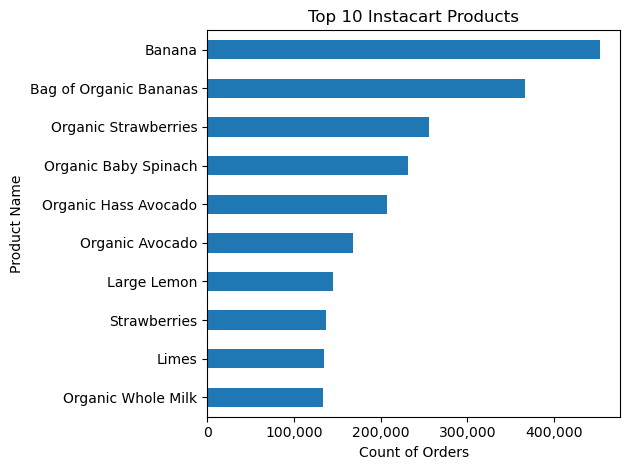

In [289]:
# Find values with top 10 occurences in 'product_name'

top_10_product_names = (df['product_name'].value_counts()).iloc[:10]

# Create bar chart to visualize top 10 values
bar_top_10_product_names = top_10_product_names.sort_values(ascending = True).plot(kind='barh')
plt.title('Top 10 Instacart Products')
plt.xlabel('Count of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

In [277]:
# Exporting visualization

bar_top_10_product_names.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'top_10_products_bar.png'), bbox_inches='tight')

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_76954/4122238511.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0.0, 0, '0'),
 Text(100000.0, 0, '100,000'),
 Text(200000.0, 0, '200,000'),
 Text(300000.0, 0, '300,000'),
 Text(400000.0, 0, '400,000'),
 Text(500000.0, 0, '500,000')]

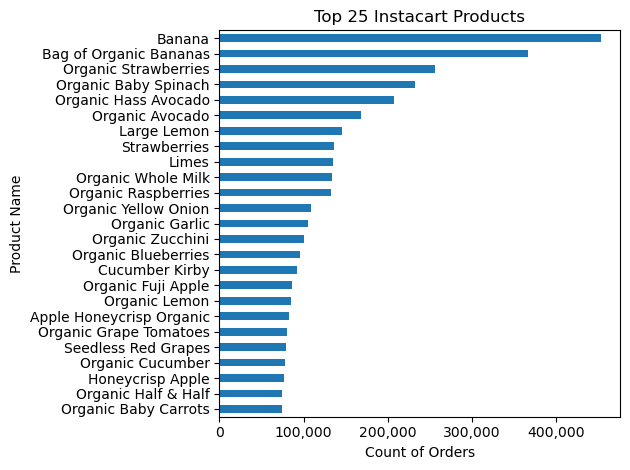

In [279]:
# Find values with top 25 occurences in 'product_name'

top_25_product_names = (df['product_name'].value_counts()).iloc[:25]

# Create bar chart to visualize top 10 values
bar_top_25_product_names = top_25_product_names.sort_values(ascending = True).plot(kind='barh')
plt.title('Top 25 Instacart Products')
plt.xlabel('Count of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

In [280]:
# Exporting visualization

bar_top_25_product_names.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'top_25_products_bar.png'), bbox_inches='tight')

In [297]:
# Creating crosstab by top 25 product names and income group

product_income = pd.crosstab(top_25_product_names, df['income_group'], dropna = False)

In [301]:
bar_product_income = product_income.plot(kind='bar')

TypeError: no numeric data to plot

In [299]:
df.groupby('product_name').agg({'order_number': ['mean']})


,order_number
,mean
product_name,
#2 Coffee Filters,19.859230
#2 Cone White Coffee Filters,16.615385
#2 Mechanical Pencils,17.000000
#4 Natural Brown Coffee Filters,19.083333
#NAME?,13.000000
...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,39.580645
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,15.888889


### Date joined
#### For curiosity's sake, I thought it might be interesting to look at the dates that customers joined Instacart in case there might be any discernable patterns between seasonality, peaks at the beginning vs end of the month, etc. This was not requested by stakeholders and the line chart below still needs some further tweaking to gain meaningful insights. 

In [124]:
# Creating a line chart showing date joined

df_date_joined = df[['date_joined', 'user_id']]

Text(0, 0.5, 'Count')

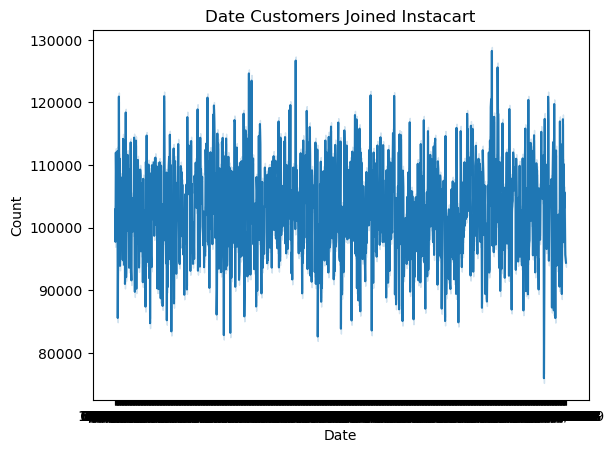

In [190]:
line_date_joined = sns.lineplot(data = df_date_joined, x = 'date_joined', y = 'user_id')
#Plotting all the lines with specifying labels
plt.title('Date Customers Joined Instacart')
plt.xlabel('Date')
plt.ylabel('Count')

In [133]:
df_date_joined_2 = df.groupby('date_joined',)[['user_id']].agg(['min','max','mean'])

In [134]:
df_date_joined_2

user_id                       
                min     max           mean
date_joined                               
1/1/2017         32  202887   98768.946656
1/1/2018       4251  206024  101378.478573
1/1/2019       2216  204979  100827.331484
1/1/2020        184  206169   92882.289644
1/10/2017      1441  205374   96864.351347
...             ...     ...            ...
9/8/2018       2797  205925  105364.992977
9/8/2019        868  205518  109022.328704
9/9/2017        939  204794  110188.888925
9/9/2018       1996  205685  100428.458743
9/9/2019       1002  205407  107248.313852

[1187 rows x 3 columns]

#### This data set contains information on customers who joined Instacart between 1/1/2017 and 9/9/2019.

## Observations
#### Customer profiles (age, income, gender, family status) are fairly evenly distributed across regions; the South accounts for the highest number of customers across all categories.
#### The majority of Instacart customers are middle income and married with one or more dependants.
#### Produce is the most popular department across all customer profiles (income, age group, family status). Dairy eggs is second most popular department across all categories.